## Read the dataset

In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)
import matplotlib.pyplot as plt
import seaborn as sn

madrid_df = pd.read_csv("data/madrid_houses.csv")
df = madrid_df.copy()

## Check its features

In [2]:
display(df.shape)
display(df.sample(5))

(21742, 58)

,Unnamed: 0,id,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,latitude,longitude,raw_address,is_exact_address_hidden,street_name,street_number,portal,floor,is_floor_under,door,neighborhood_id,operation,rent_price,rent_price_by_area,is_rent_price_known,buy_price,buy_price_by_area,is_buy_price_known,house_type_id,is_renewal_needed,is_new_development,built_year,has_central_heating,has_individual_heating,are_pets_allowed,has_ac,has_fitted_wardrobes,has_lift,is_exterior,has_garden,has_pool,has_terrace,has_balcony,has_storage_room,is_furnished,is_kitchen_equipped,is_accessible,has_green_zones,energy_certificate,has_parking,has_private_parking,has_public_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
12295,12295,9447,Piso en venta en calle de José Abascal,"Almagro, Madrid",210.0,NaN,3,4.0,NaN,NaN,NaN,NaN,Calle de José Abascal,True,Calle de José Abascal,NaN,NaN,2,False,NaN,Neighborhood 32: Almagro (6564.27 €/m2) - Dist...,sale,-5161,NaN,False,1599000,7614,True,HouseType 1: Pisos,False,False,1950.0,True,False,NaN,True,True,True,True,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,E,False,NaN,NaN,NaN,NaN,True,False,False,False
10500,10500,11242,"Piso en venta en YARUMAL, 2","Pinar del Rey, Madrid",78.0,NaN,3,1.0,NaN,NaN,NaN,NaN,"YARUMAL, 2",False,YARUMAL,2,NaN,4,False,NaN,Neighborhood 61: Pinar del Rey (2915.33 €/m2) ...,sale,879,NaN,False,188400,2415,True,HouseType 1: Pisos,False,False,NaN,False,True,NaN,NaN,True,True,True,NaN,NaN,True,NaN,NaN,NaN,NaN,True,NaN,en trámite,False,NaN,NaN,NaN,NaN,False,False,True,False
3233,3233,18509,"Piso en venta en calle juan del risco, 24","Berruguete, Madrid",50.0,NaN,1,1.0,NaN,NaN,NaN,NaN,"Calle juan del risco, 24",False,Calle juan del risco,24,NaN,Bajo,True,NaN,Neighborhood 112: Berruguete (3273.56 €/m2) - ...,sale,851,NaN,False,180000,3600,True,HouseType 1: Pisos,False,False,NaN,NaN,NaN,NaN,True,True,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,False,NaN,NaN,NaN,NaN,False,False,False,True
13982,13982,7760,Piso en venta en Castilla,"Chamartín, Madrid",150.0,NaN,4,3.0,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,6,False,NaN,Neighborhood 26: Castilla (4354.35 €/m2) - Dis...,sale,2058,NaN,False,670000,4467,True,HouseType 1: Pisos,False,False,1987.0,False,True,NaN,True,NaN,True,True,NaN,True,True,NaN,NaN,NaN,NaN,NaN,True,en trámite,True,NaN,NaN,True,0.0,NaN,NaN,NaN,NaN
5572,5572,16170,"Piso en venta en calle Sanz Raso, 38","Numancia, Madrid",65.0,56.0,2,1.0,NaN,NaN,NaN,NaN,"Calle Sanz Raso, 38",False,Calle Sanz Raso,38,NaN,Bajo,True,NaN,Neighborhood 90: Numancia (2081.94 €/m2) - Dis...,sale,662,NaN,False,129000,1985,True,HouseType 1: Pisos,False,NaN,1900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no indicado,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Explore missing values

In [3]:
missing_cnt = df.isna().sum()
display(missing_cnt[missing_cnt != 0].sort_values(ascending=False))

rent_price_by_area              21742
is_furnished                    21742
latitude                        21742
longitude                       21742
has_private_parking             21742
has_public_parking              21742
portal                          21742
is_kitchen_equipped             21742
are_pets_allowed                21742
door                            21742
sq_mt_allotment                 20310
n_floors                        20305
has_garden                      20186
has_balcony                     18421
has_green_zones                 17685
is_accessible                   17668
has_pool                        16571
street_number                   15442
has_storage_room                14044
parking_price                   14023
is_parking_included_in_price    14023
sq_mt_useful                    13514
has_terrace                     12194
built_year                      11742
has_ac                          10531
is_orientation_north            10384
is_orientati

### Drop columns with +20% of missing values

In [4]:
df = df.dropna(axis='columns', thresh=df.shape[0]*0.8, how='all')
missing_cnt = df.isna().sum()
display(missing_cnt[missing_cnt != 0].sort_values(ascending=False))

is_exterior           3043
floor                 2607
has_lift              2386
is_floor_under        1170
is_new_development     992
house_type_id          391
sq_mt_built            126
n_bathrooms             16
dtype: int64

### Drop rows with missing values
- [x] Check if after dropping these rows we still have enough data to work with.

In [5]:
display(len(df))
df = df.dropna()
display(len(df))
missing_cnt = df.isna().sum()
display(missing_cnt[missing_cnt != 0].sort_values(ascending=False))

21742

17397

Series([], dtype: int64)

Now we have a dataframe without missing values, and it's still big enough.

## Check columns types

In [6]:
display(df.dtypes)

Unnamed: 0                   int64
id                           int64
title                       object
subtitle                    object
sq_mt_built                float64
n_rooms                      int64
n_bathrooms                float64
is_exact_address_hidden       bool
floor                       object
is_floor_under              object
neighborhood_id             object
operation                   object
rent_price                   int64
is_rent_price_known           bool
buy_price                    int64
buy_price_by_area            int64
is_buy_price_known            bool
house_type_id               object
is_renewal_needed             bool
is_new_development          object
has_lift                    object
is_exterior                 object
energy_certificate          object
has_parking                   bool
dtype: object

It seems to be a few columns with wrong type.

- [x] Check if this is true
- [x] Fix types of columns

In [7]:
display(df['n_bathrooms'].unique())
display(df['floor'].unique())
display(df['is_floor_under'].unique())
display(df['is_new_development'].unique())
display(df['has_lift'].unique())
display(df['is_exterior'].unique())
display(df.sample(10))

array([ 1.,  2.,  3.,  6.,  4.,  5., 14.,  7.,  9., 10.,  8.])

array(['3', '4', '1', 'Bajo', '2', '7', '5', '6', 'Entreplanta exterior',
       '8', '9', 'Entreplanta interior', 'Semi-sótano exterior',
       'Sótano interior', 'Semi-sótano interior', 'Sótano exterior'],
      dtype=object)

array([False, True], dtype=object)

array([False, True], dtype=object)

array([False, True], dtype=object)

array([True, False], dtype=object)

,Unnamed: 0,id,title,subtitle,sq_mt_built,n_rooms,n_bathrooms,is_exact_address_hidden,floor,is_floor_under,neighborhood_id,operation,rent_price,is_rent_price_known,buy_price,buy_price_by_area,is_buy_price_known,house_type_id,is_renewal_needed,is_new_development,has_lift,is_exterior,energy_certificate,has_parking
8957,8957,12785,"Piso en venta en plaza de El Pardo, 1","El Pardo, Madrid",90.0,4,1.0,False,Bajo,True,Neighborhood 47: El Pardo (None €/m2) - Distri...,sale,1174,False,290000,3222,True,HouseType 1: Pisos,False,False,True,True,no indicado,False
2134,2134,19608,"Piso en venta en calle Jesús del Gran Poder, 7","Moscardó, Madrid",60.0,1,1.0,False,2,False,Neighborhood 118: Moscardó (2284.48 €/m2) - Di...,sale,851,False,180000,3000,True,HouseType 1: Pisos,False,False,True,True,G,False
13133,13133,8609,Piso en venta en avenida Donostiarra,"Concepción, Madrid",53.0,2,1.0,True,1,False,Neighborhood 38: Concepción (3341.09 €/m2) - D...,sale,994,False,225000,4245,True,HouseType 1: Pisos,False,False,True,True,E,False
15020,15020,6722,Piso en venta en calle de Francisco Silvela,"Prosperidad, Madrid",91.0,3,1.0,True,7,False,Neighborhood 30: Prosperidad (4255.84 €/m2) - ...,sale,1485,False,420000,4615,True,HouseType 1: Pisos,True,False,True,True,D,False
7280,7280,14462,"Dúplex en venta en calle José Fentanes , 10","Ciudad Universitaria, Madrid",246.0,4,5.0,False,Bajo,True,Neighborhood 75: Ciudad Universitaria (3810.08...,sale,712,False,1330000,5407,True,HouseType 4: Dúplex,False,True,True,True,en trámite,True
14954,14954,6788,Ático en venta en El Viso,"Chamartín, Madrid",347.0,5,5.0,True,4,False,Neighborhood 28: El Viso (6255.45 €/m2) - Dist...,sale,-38920,False,2100000,6052,True,HouseType 5: Áticos,False,False,True,True,A,True
9243,9243,12499,"Ático en venta en calle Isla de Zanzibar, 59","Peñagrande, Madrid",154.0,3,2.0,False,2,False,Neighborhood 53: Peñagrande (3271.96 €/m2) - D...,sale,2117,False,696000,4519,True,HouseType 5: Áticos,False,True,True,True,en trámite,True
2463,2463,19279,Piso en venta en calle Piedrabuena,"Almendrales, Madrid",68.0,2,1.0,True,4,False,Neighborhood 117: Almendrales (2205.31 €/m2) -...,sale,725,False,145000,2132,True,HouseType 1: Pisos,False,False,True,True,E,False
3085,3085,18657,"Piso en venta en avenida de la Reina Victoria, 18","Bellas Vistas, Madrid",105.0,3,1.0,False,1,False,Neighborhood 111: Bellas Vistas (3536.07 €/m2)...,sale,1358,False,365000,3476,True,HouseType 1: Pisos,False,False,True,False,en trámite,False
5951,5951,15791,Piso en venta en calle del Corregidor Juan Fra...,"Fontarrón, Madrid",127.0,4,2.0,True,1,False,Neighborhood 81: Fontarrón (2319.44 €/m2) - Di...,sale,1330,False,353000,2780,True,HouseType 1: Pisos,False,False,True,True,en trámite,False


As we thought, some of these columns have wrong types

In [8]:
df['n_bathrooms'] = df['n_bathrooms'].astype(int)
df['is_floor_under'] = df['is_floor_under'].astype(bool)
df['is_new_development'] = df['is_new_development'].astype(bool)
df['has_lift'] = df['has_lift'].astype(bool)
df['is_exterior'] = df['is_exterior'].astype(bool)
df['sq_mt_built'] = df['sq_mt_built'].astype(int)

display(df.dtypes)

Unnamed: 0                  int64
id                          int64
title                      object
subtitle                   object
sq_mt_built                 int64
n_rooms                     int64
n_bathrooms                 int64
is_exact_address_hidden      bool
floor                      object
is_floor_under               bool
neighborhood_id            object
operation                  object
rent_price                  int64
is_rent_price_known          bool
buy_price                   int64
buy_price_by_area           int64
is_buy_price_known           bool
house_type_id              object
is_renewal_needed            bool
is_new_development           bool
has_lift                     bool
is_exterior                  bool
energy_certificate         object
has_parking                  bool
dtype: object

## Plot histograms

### Plot numerical data in histograms with `pandas`

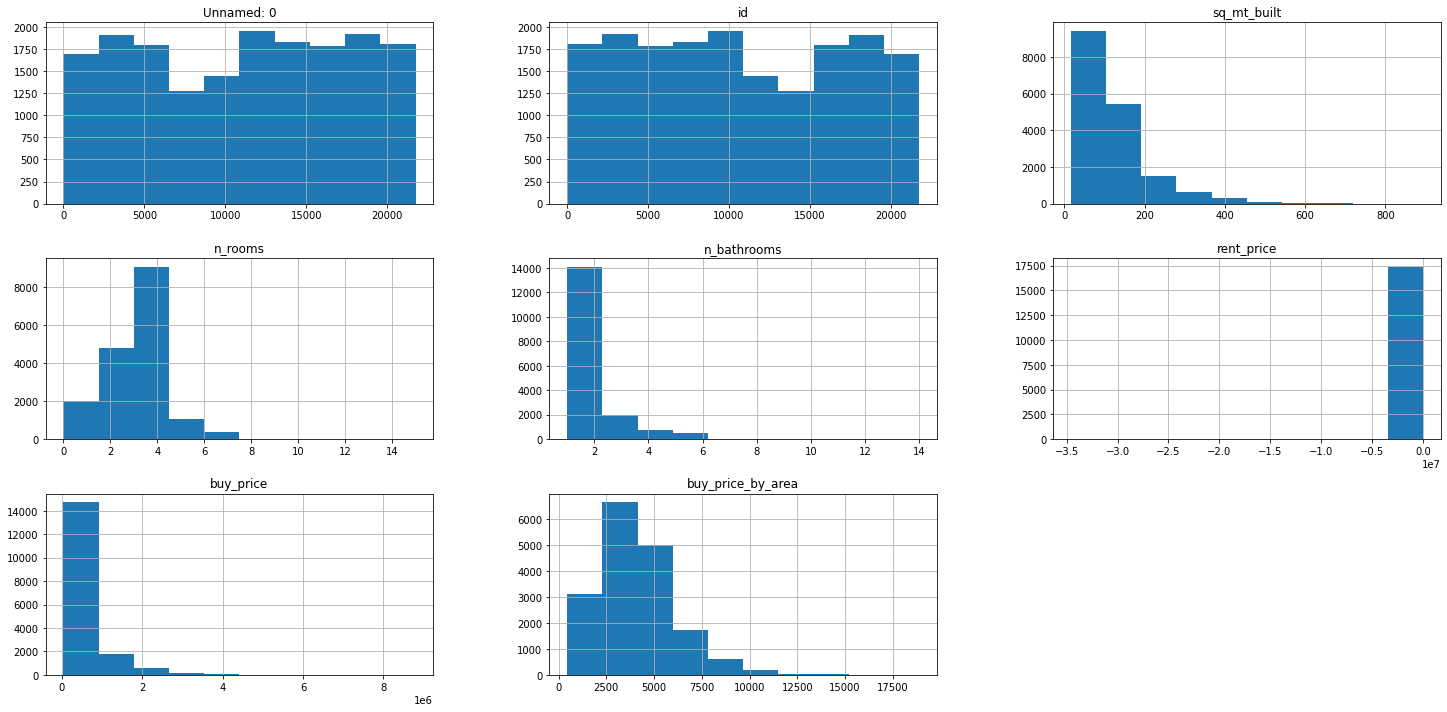

In [9]:
plt.rcParams['figure.figsize'] = [25, 12]
df.hist()
plt.show()

- It seems to be some issue with `rent_price` as it has negative values.
- `Unnamed: 0` and `id` can be safely dropped.
- As `buy_price` is our target, we should later drop `buy_price_by_area`.

### Plot non-continuous data by value counts

Skipping Unnamed: 0
Skipping id
Skipping title


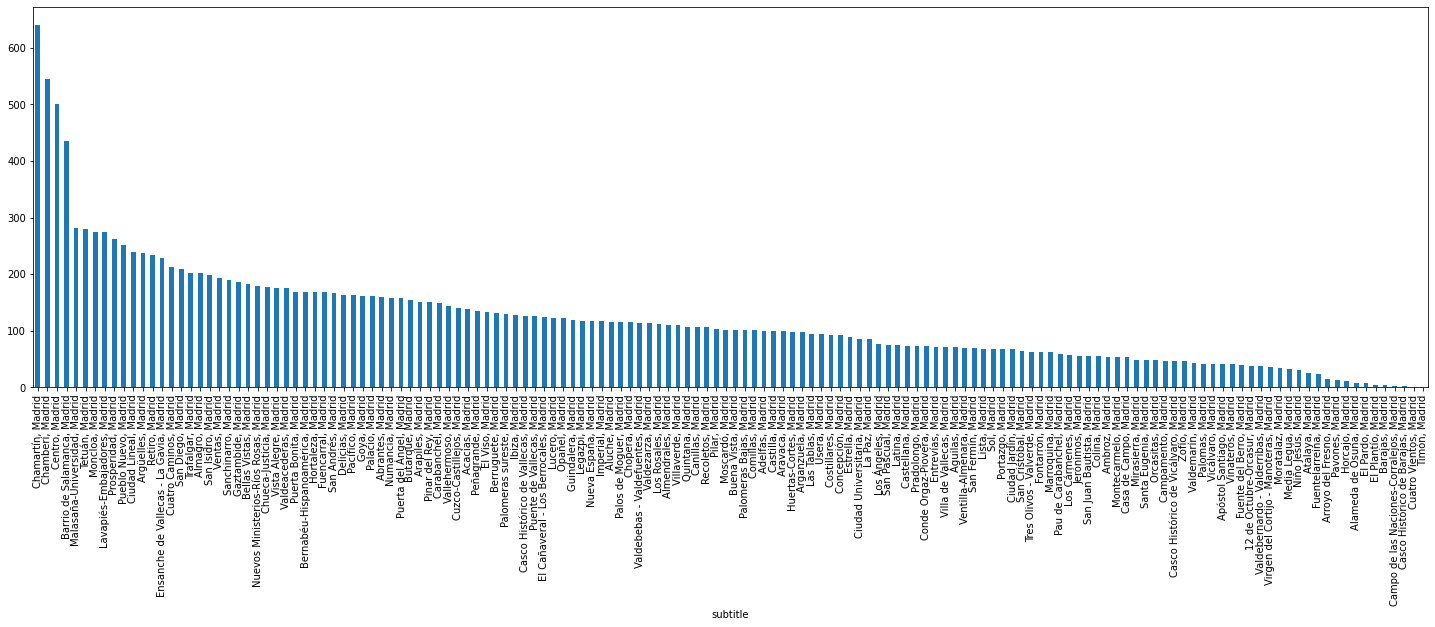

Skipping sq_mt_built


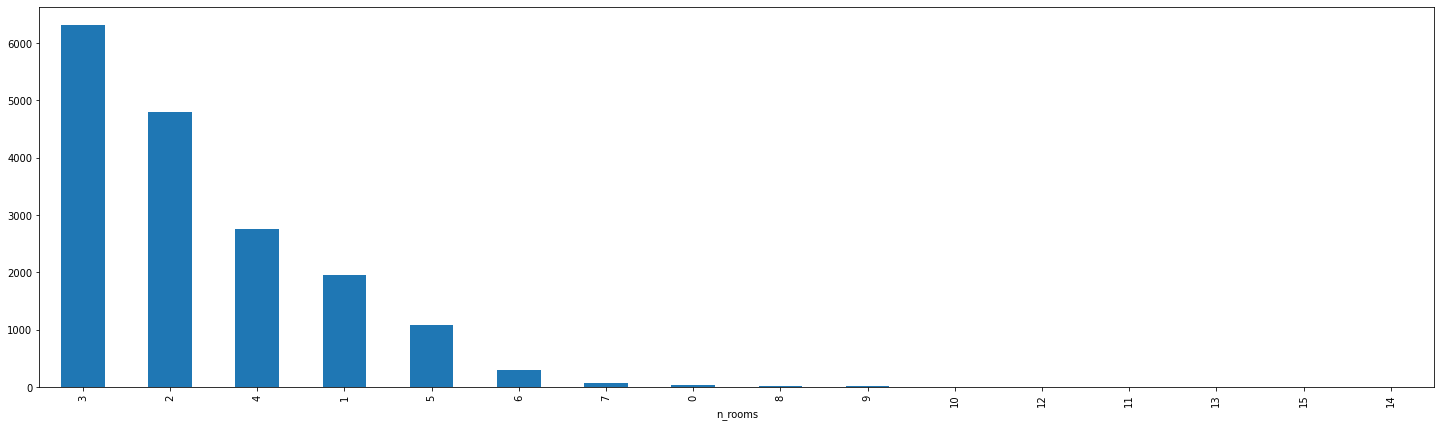

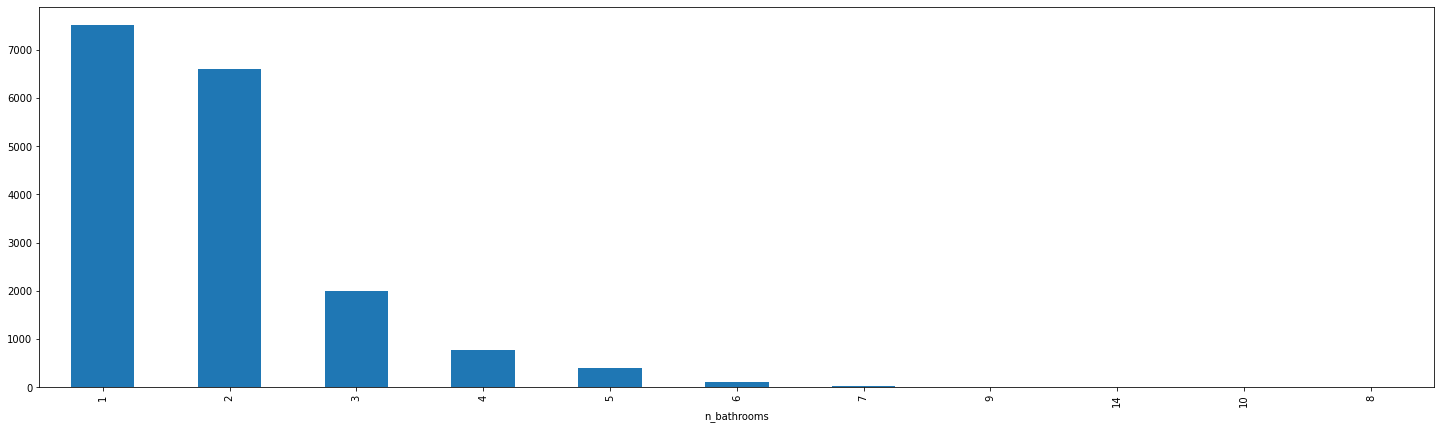

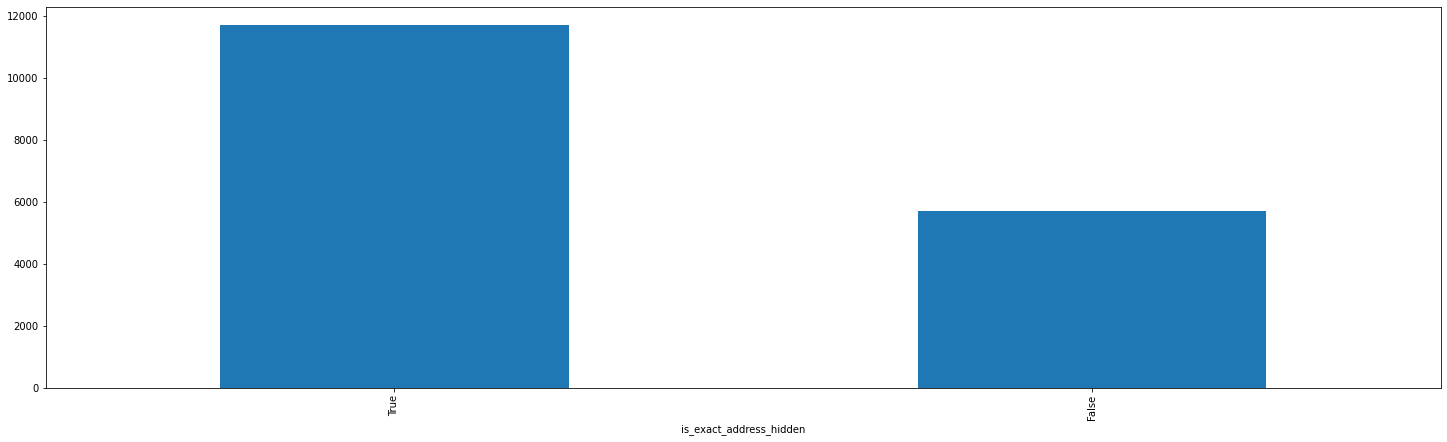

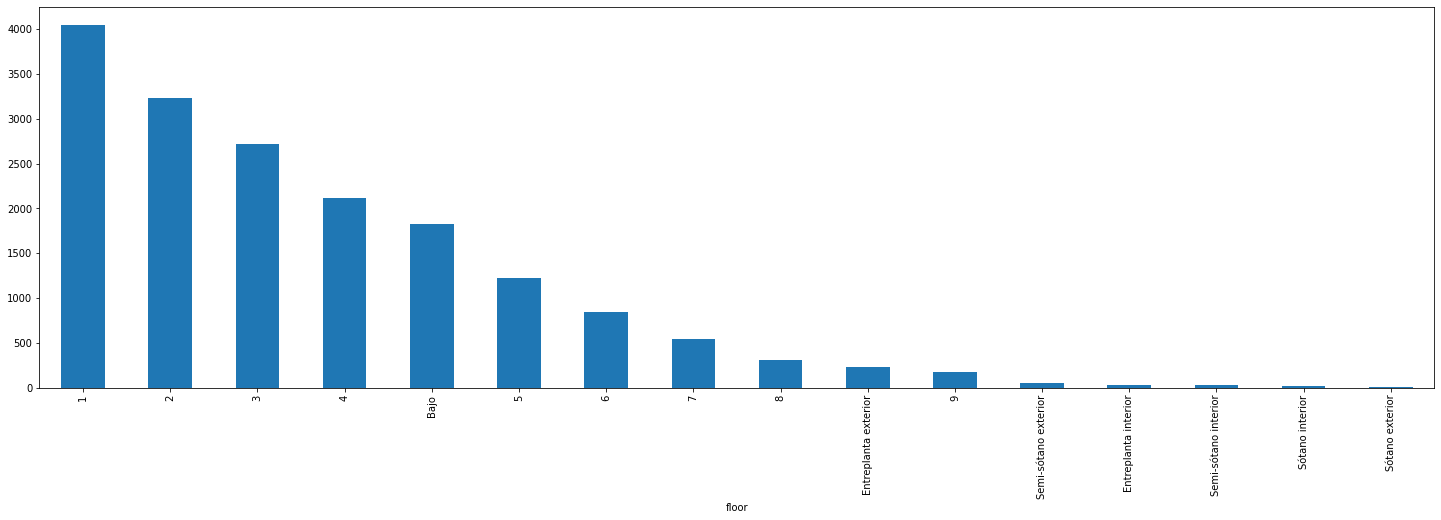

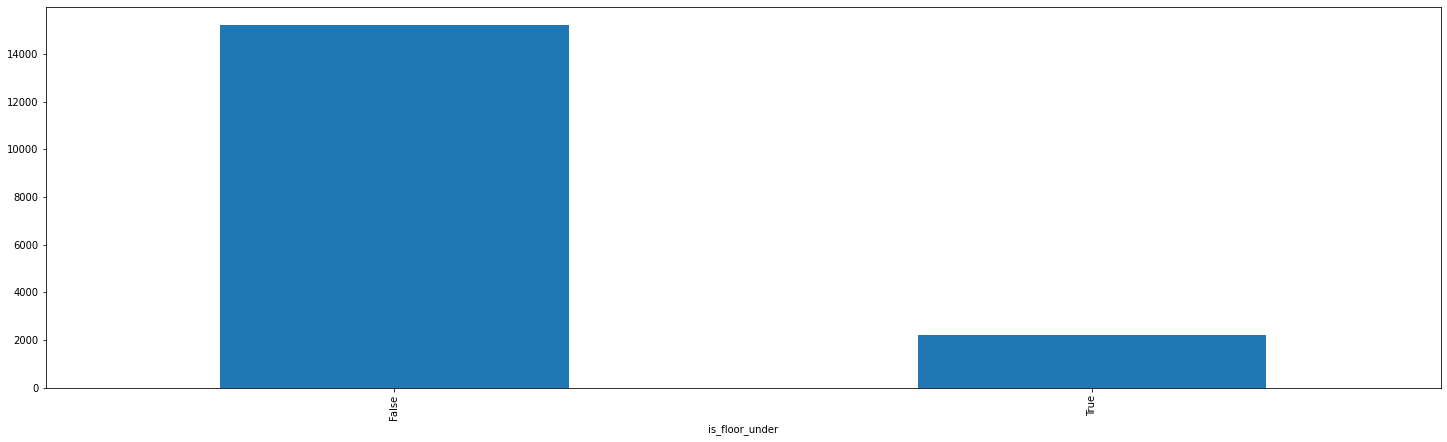

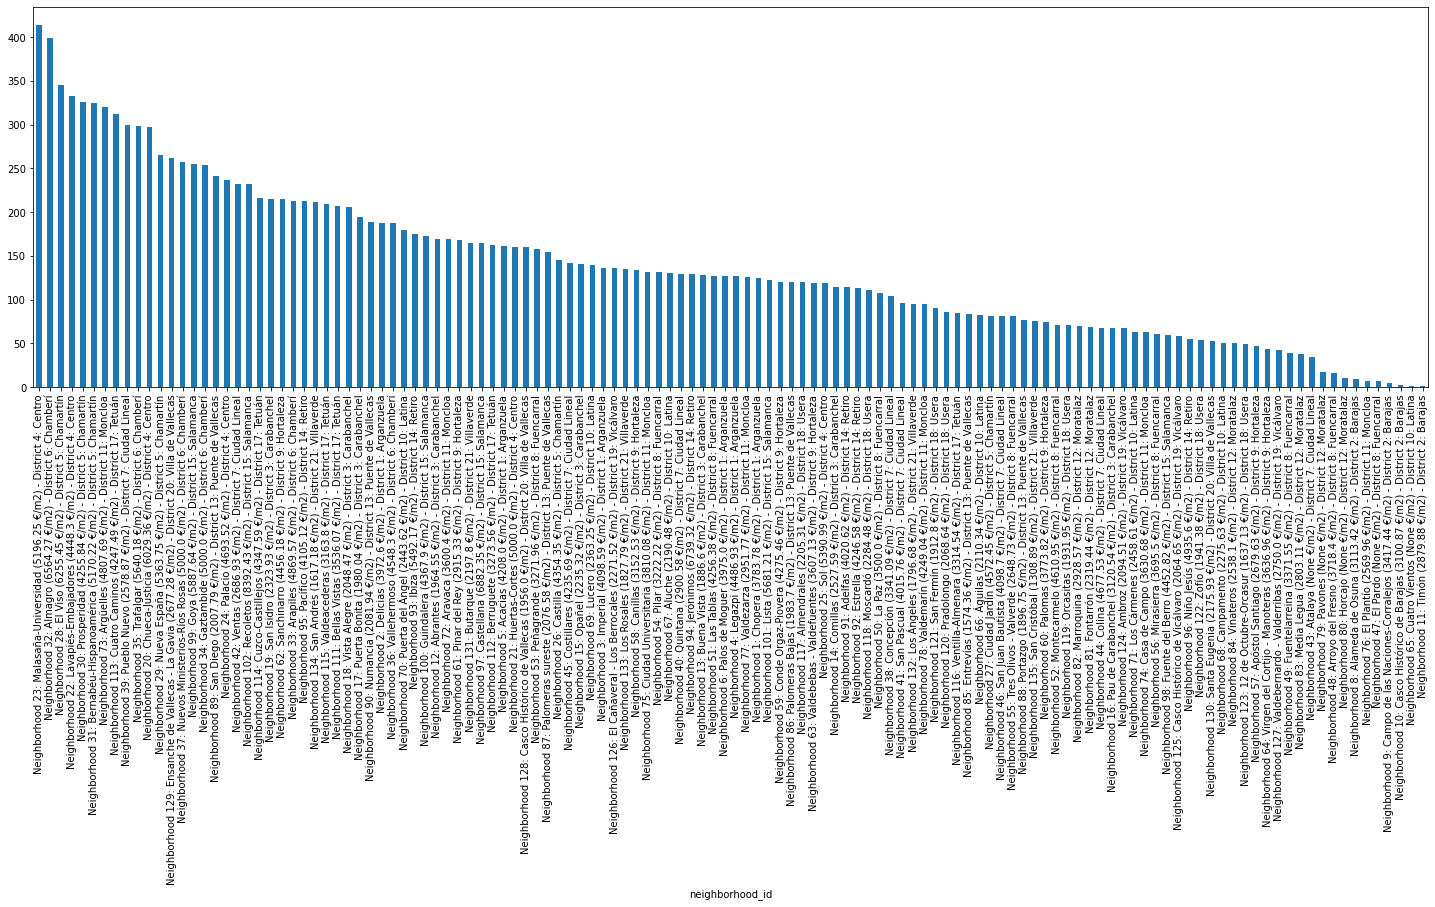

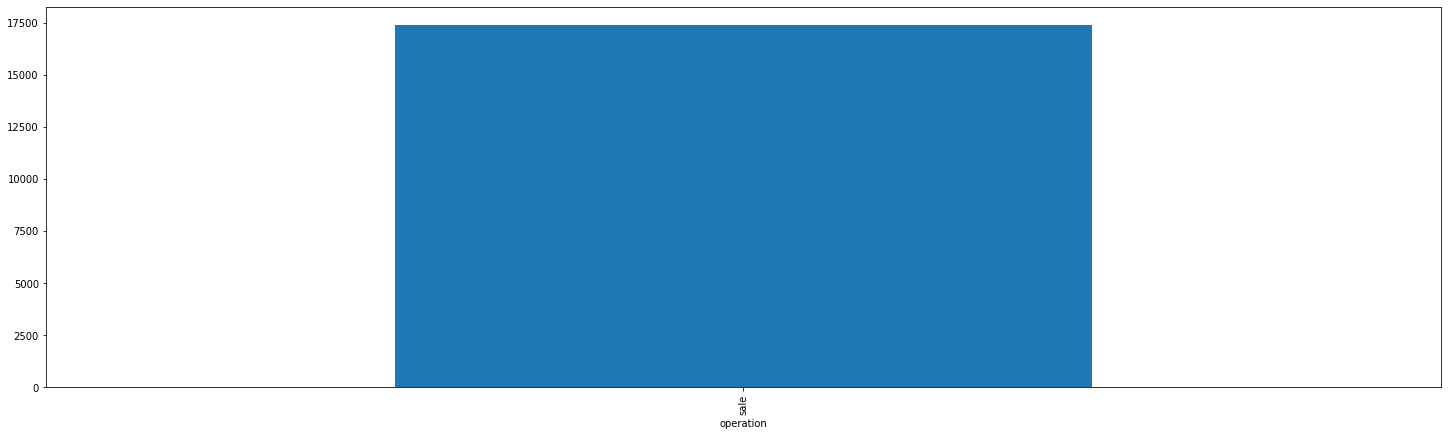

Skipping rent_price


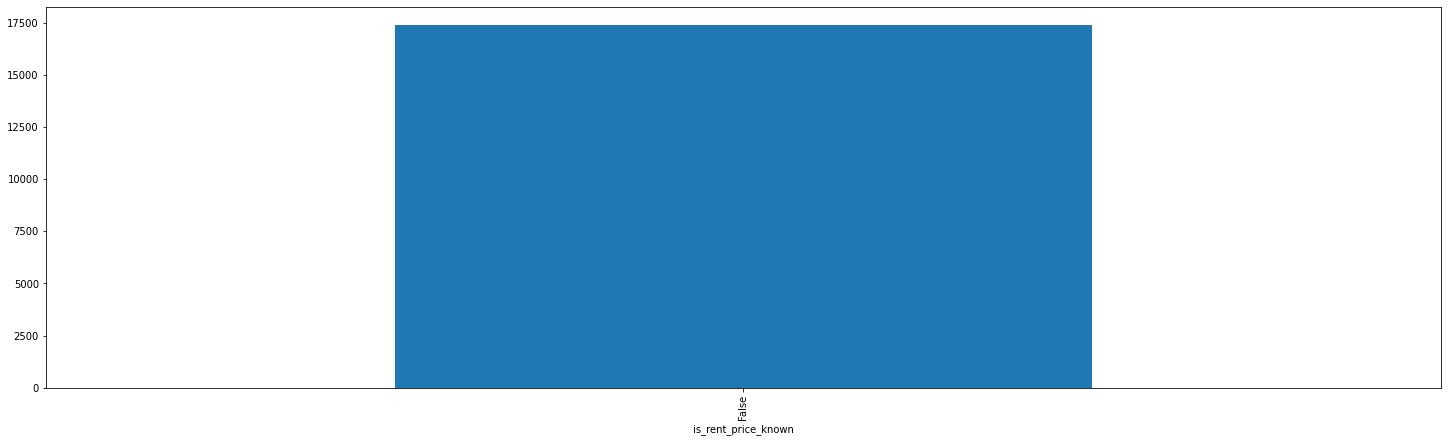

Skipping buy_price
Skipping buy_price_by_area


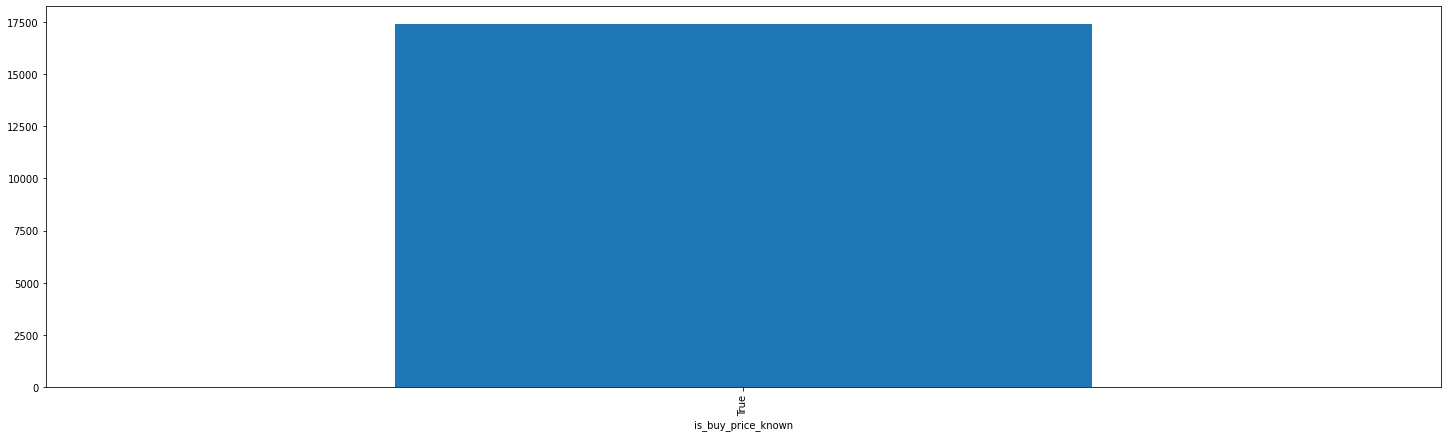

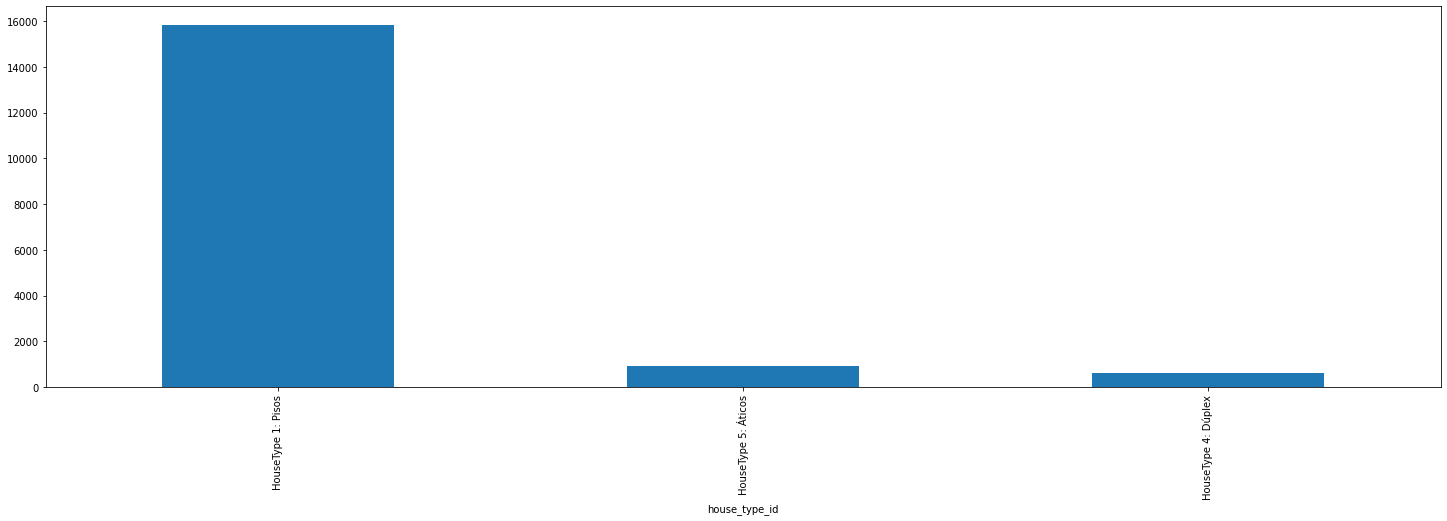

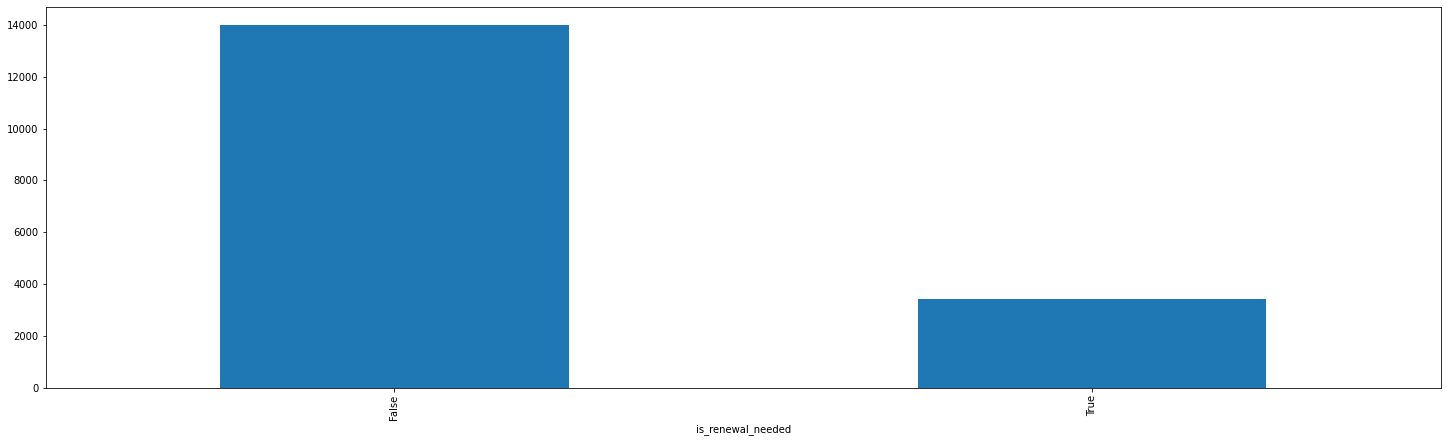

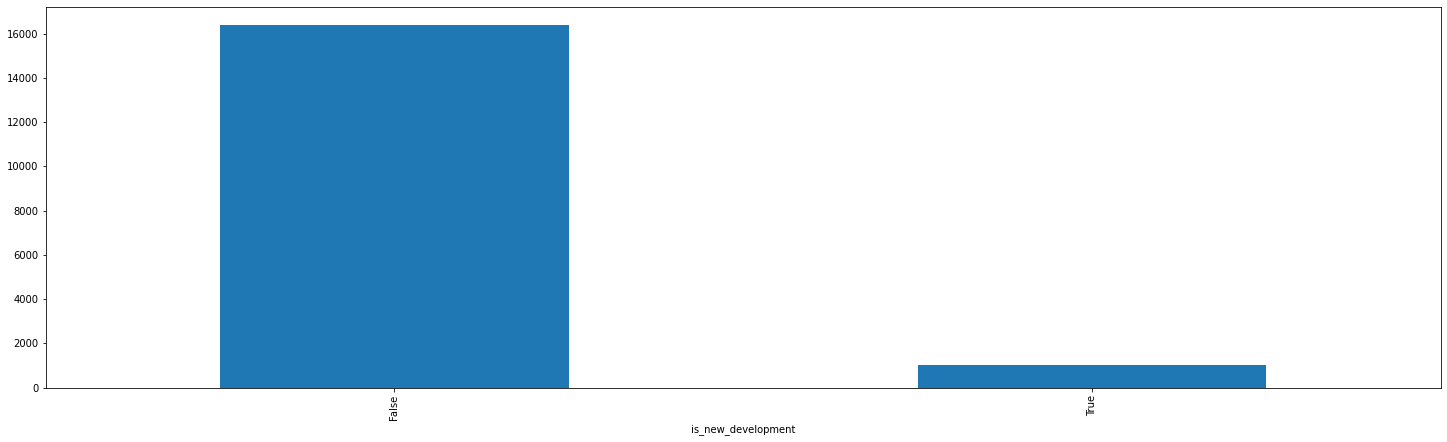

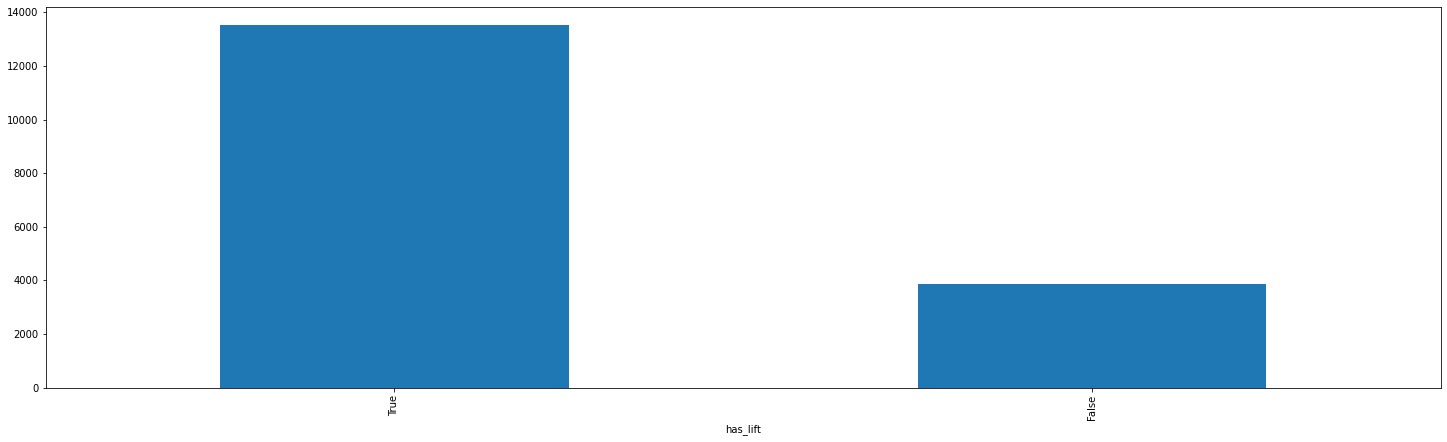

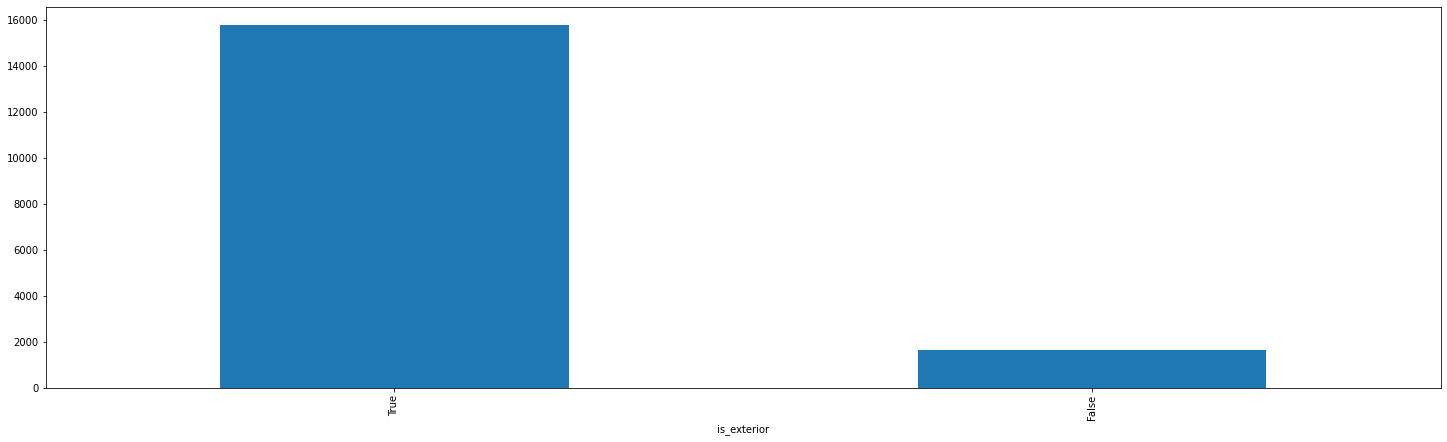

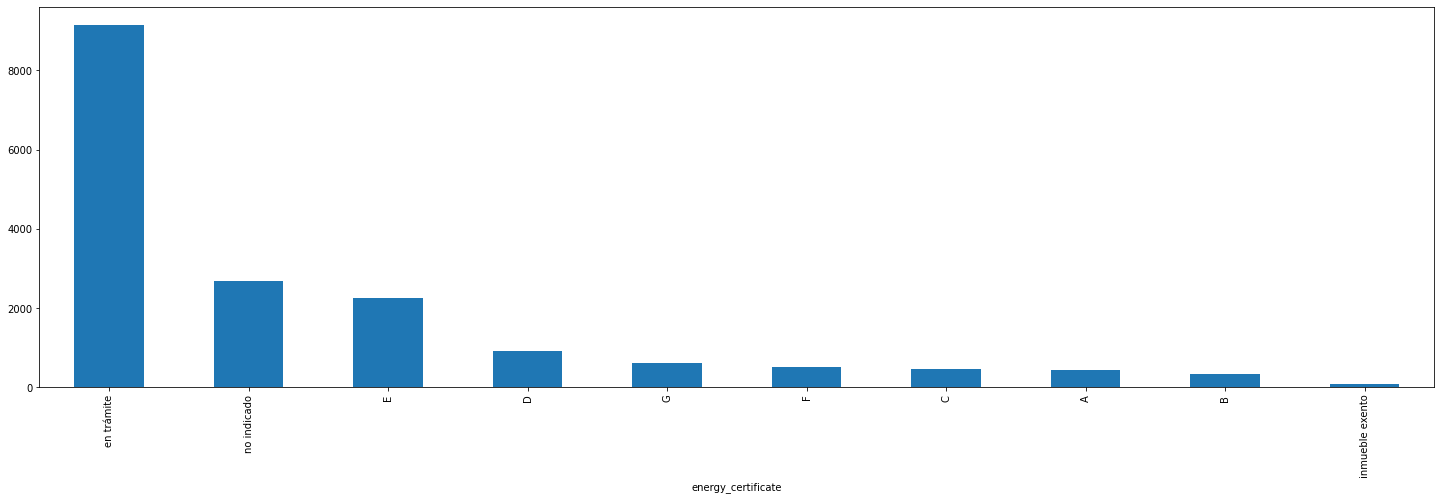

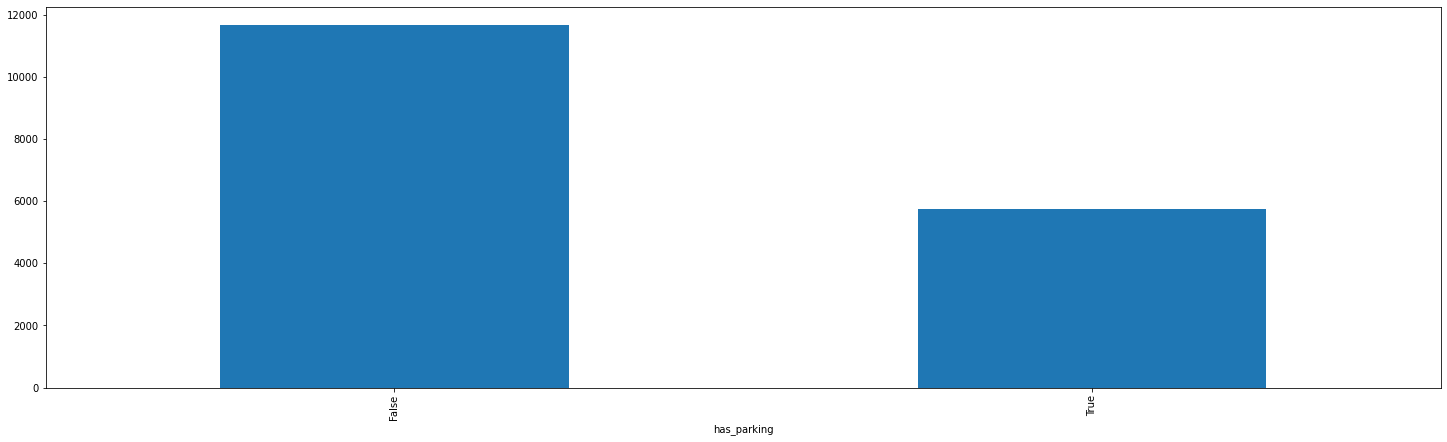

In [10]:
plt.rcParams['figure.figsize'] = [25, 7]

for col in df.columns:
    if len(df[col].value_counts()) > 150:
        print("Skipping {}".format(col))
        continue
    plt.xlabel(col)
    df[col].value_counts().plot(kind='bar')
    plt.show()

- We can drop `is_buy_price_known`, `is_rent_price_known` and `operation` as they only have one value.
- We can drop `title` and `subtitle` because they have categorical data with too many categories. Maybe we could perform text analytics to check if there are any words that could impact the house price, but it's not the goal of this project.

#### Further anlysis needed:
- [x] Explore and simplify `floor` and `is_floor_under`.
- [x] Explore and simplify `energy_certificate`.

### Resulting modifications

- [x] Explore `rent_price` and modify

count    1.739700e+04
mean    -1.948369e+04
std      4.391754e+05
min     -3.459028e+07
25%      7.800000e+02
50%      1.165000e+03
75%      1.724000e+03
max      2.517000e+03
Name: rent_price, dtype: float64

count    17397.000000
mean        20.876513
std        114.512482
min      -2562.962963
9.5%        15.182186
10%         15.355086
25%         17.094017
50%         20.621109
75%         25.716695
90%         28.844801
99%         84.321476
max       6388.888889
Name: price_to_rent_ratio, dtype: float64

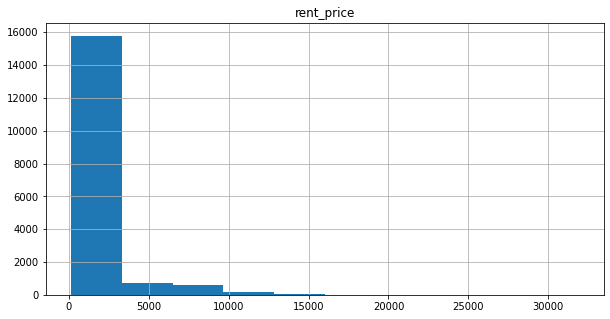

count    17397.000000
mean      1943.483187
std       2109.839083
min        130.000000
25%        913.000000
50%       1346.000000
75%       2012.000000
max      31884.000000
Name: rent_price, dtype: float64

Series([], dtype: int64)

In [11]:
display(df['rent_price'].describe())

df['price_to_rent_ratio'] = df['buy_price'] / (df['rent_price'] * 12)
display(df['price_to_rent_ratio'].describe(percentiles=[.095, .1, .25, .5, .75, .9, .99]))

wrong_p2r_index = (df['price_to_rent_ratio'] < 15) | (df['price_to_rent_ratio'] > 100)
avg_p2r_ratio = 23 * 12
df.loc[wrong_p2r_index, 'rent_price'] = df.loc[wrong_p2r_index, 'buy_price'] / avg_p2r_ratio
df['rent_price'] = df['rent_price'].astype(int)

df = df.drop('price_to_rent_ratio', axis='columns')

plt.rcParams['figure.figsize'] = [10, 5]
df[['rent_price']].hist()
plt.show()
display(df['rent_price'].describe())

missing_cnt = df.isna().sum()
display(missing_cnt[missing_cnt != 0].sort_values(ascending=False))

- [x] Drop `Unnamed: 0`
- [x] Drop `id`
- [x] Drop `is_buy_price_known`
- [x] Drop `is_rent_price_known`
- [x] Drop `operation`
- [x] Drop `title`
- [x] Drop `subtitle`

In [12]:
drop_cols = ['Unnamed: 0', 'id', 'is_buy_price_known', 'is_rent_price_known',
             'operation', 'title', 'subtitle']
df = df.drop(drop_cols, axis='columns')

display(df.columns)

Index(['sq_mt_built', 'n_rooms', 'n_bathrooms', 'is_exact_address_hidden',
       'floor', 'is_floor_under', 'neighborhood_id', 'rent_price', 'buy_price',
       'buy_price_by_area', 'house_type_id', 'is_renewal_needed',
       'is_new_development', 'has_lift', 'is_exterior', 'energy_certificate',
       'has_parking'],
      dtype='object')

- [x] Transform `neighborhood_id`. Maybe we can extract useful information.

In [13]:
pattern = r'Neighborhood \d+: ([a-zA-ZáéíóúüÁÉÍÓÚÜñÑ0-9\-" "]+) \(([\d\.]+|None) €\/m2\) - District \d+: ([a-zA-ZáéíóúüÁÉÍÓÚÜñÑ0-9\-" "]+)'
df[['neighborhood', 'neighborhood_price', 'district']] = df['neighborhood_id'].str.extractall(pattern).unstack()

df['neighborhood_price'] = pd.to_numeric(df['neighborhood_price'], errors='coerce')

display(df.sample(5))

df = df.drop('neighborhood_id', axis='columns')

,sq_mt_built,n_rooms,n_bathrooms,is_exact_address_hidden,floor,is_floor_under,neighborhood_id,rent_price,buy_price,buy_price_by_area,house_type_id,is_renewal_needed,is_new_development,has_lift,is_exterior,energy_certificate,has_parking,neighborhood,neighborhood_price,district
4327,116,3,2,False,2,False,Neighborhood 93: Ibiza (5492.17 €/m2) - Distri...,1913,607000,5233,HouseType 1: Pisos,False,False,True,True,en trámite,False,Ibiza,5492.17,Retiro
21709,58,2,1,True,3,False,Neighborhood 5: Acacias (4208.0 €/m2) - Distri...,976,219000,3776,HouseType 1: Pisos,True,False,False,False,en trámite,False,Acacias,4208.00,Arganzuela
500,67,3,1,False,1,False,Neighborhood 134: San Andrés (1617.18 €/m2) - ...,744,150000,2239,HouseType 1: Pisos,False,False,False,True,no indicado,False,San Andrés,1617.18,Villaverde
15190,255,4,3,True,5,False,Neighborhood 28: El Viso (6255.45 €/m2) - Dist...,5724,1580000,6196,HouseType 1: Pisos,True,False,True,True,en trámite,True,El Viso,6255.45,Chamartín
10780,74,3,1,False,3,False,Neighborhood 57: Apóstol Santiago (2679.63 €/m...,798,165000,2230,HouseType 1: Pisos,False,False,False,True,D,False,Apóstol Santiago,2679.63,Hortaleza


We divide `neighborhood_id` in 3 different columns, this way we can probably extract more useful information.

In [14]:
display(df.loc[df['neighborhood_price'].isna(), 'neighborhood'].unique())
display(df.loc[df['neighborhood_price'].isna(), 'district'].unique())

missing_cnt = df.isna().sum()
display(missing_cnt[missing_cnt != 0].sort_values(ascending=False))

array(['Horcajo', 'Pavones', 'Cuatro Vientos', 'El Pardo', 'Atalaya'],
      dtype=object)

array(['Moratalaz', 'Latina', 'Fuencarral', 'Ciudad Lineal'], dtype=object)

neighborhood_price    71
dtype: int64

As we can see, some of the neighborhoods have NaN values in the `neighborhood_price`. We could drop these rows, because they are very few values.

In [15]:
df = df.dropna(subset=['neighborhood_price'])

missing_cnt = df.isna().sum()
display(missing_cnt[missing_cnt != 0].sort_values(ascending=False))

Series([], dtype: int64)

In [16]:
display(df.groupby(by='neighborhood').first().sort_values(by='neighborhood_price', ascending=False)[['district', 'neighborhood_price']])

,district,neighborhood_price
neighborhood,,
Recoletos,Salamanca,8392.43
Castellana,Salamanca,6882.35
Jerónimos,Retiro,6739.32
Almagro,Chamberí,6564.27
El Viso,Chamartín,6255.45
...,...,...
Los Ángeles,Villaverde,1796.68
12 de Octubre-Orcasur,Usera,1637.13
San Andrés,Villaverde,1617.18


## Visualize correlations

### Direct correlations (numeric and boolean)

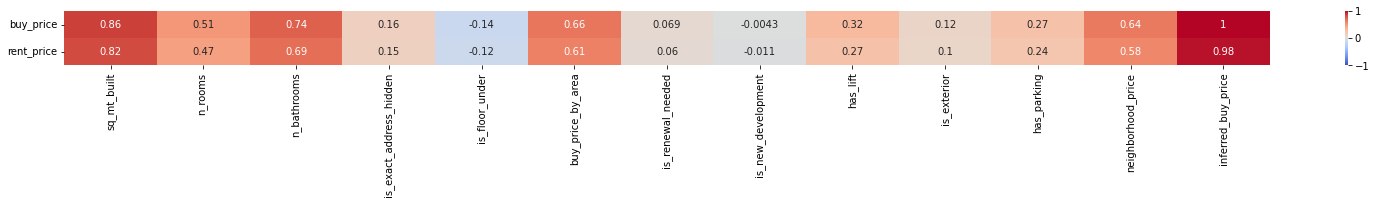

In [17]:
plt.rcParams['figure.figsize'] = [27, 1]

aux_df = df.copy()
aux_df['inferred_buy_price'] = aux_df['sq_mt_built'] * aux_df['buy_price_by_area']
correlations = aux_df.corr().loc[['buy_price', 'rent_price'], :].drop(['buy_price', 'rent_price'], axis='columns')
sn.heatmap(correlations, annot=True, cmap='coolwarm', vmax=1, vmin=-1)
plt.show()

- Based on the previous correlations we can drop `is_exact_address_hidden`, `is_renewal_needed`, `is_new_development` safely.
- We could drop `is_floor_under`, but we should first explore the categorical column `floor` and decide it afterwards.
- We can obtain our target `buy_price` multiplying `buy_price_by_area` and `sq_mt_built`, so we definitely have to drop it.

In [18]:
df = df.drop(['is_exact_address_hidden', 'is_renewal_needed', 'is_new_development', 'buy_price_by_area'], axis='columns')
display(df.columns)
display(df.dtypes)

Index(['sq_mt_built', 'n_rooms', 'n_bathrooms', 'floor', 'is_floor_under',
       'rent_price', 'buy_price', 'house_type_id', 'has_lift', 'is_exterior',
       'energy_certificate', 'has_parking', 'neighborhood',
       'neighborhood_price', 'district'],
      dtype='object')

sq_mt_built             int64
n_rooms                 int64
n_bathrooms             int64
floor                  object
is_floor_under           bool
rent_price              int64
buy_price               int64
house_type_id          object
has_lift                 bool
is_exterior              bool
energy_certificate     object
has_parking              bool
neighborhood           object
neighborhood_price    float64
district               object
dtype: object

### `floor` correlations 

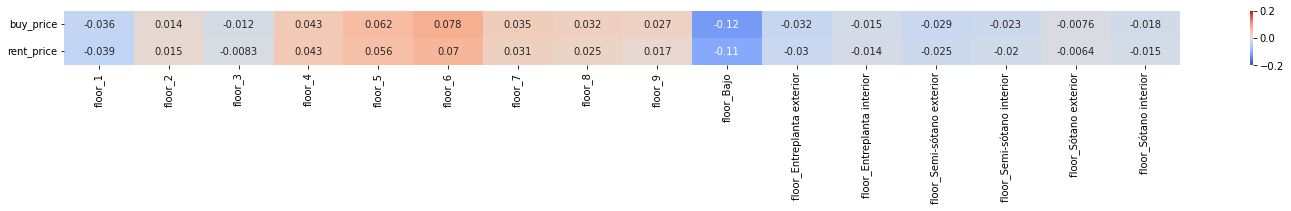

In [19]:
plt.rcParams['figure.figsize'] = [25, 1]
floor_df = pd.get_dummies(df['floor'], prefix='floor')
floor_df[['buy_price', 'rent_price']] = df[['buy_price', 'rent_price']]

correlations = floor_df.corr().loc[['buy_price', 'rent_price'], :].drop(['buy_price', 'rent_price'], axis='columns')
sn.heatmap(correlations, annot=True, cmap="coolwarm", vmax=0.2, vmin=-0.2)
plt.show()

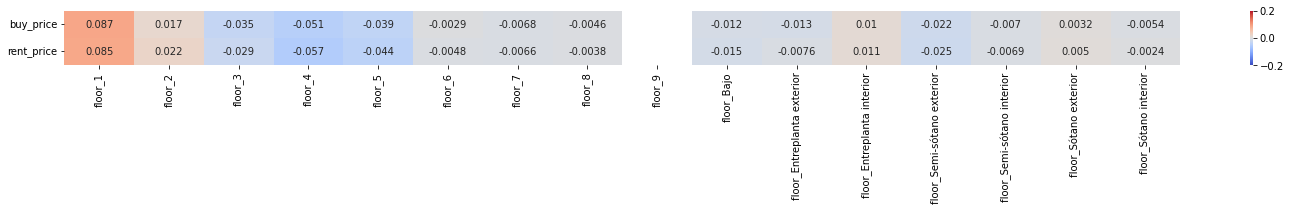

In [20]:
plt.rcParams['figure.figsize'] = [25, 1]
floor_no_lift_df = floor_df.loc[df['has_lift'] == False]
correlations = floor_no_lift_df.corr().loc[['buy_price', 'rent_price'], :].drop(['buy_price', 'rent_price'], axis='columns')
sn.heatmap(correlations, annot=True, cmap="coolwarm", vmax=0.2, vmin=-0.2)
plt.show()

- We can see that being in ground floor or other type of floor has a negative impact in the price.
- It seems people value more 4-7th floors, and less >7th or <4th floors.
- As expected, in buildings without lift, people prefer 1-2 floors and don't hate so much being in ground floor.

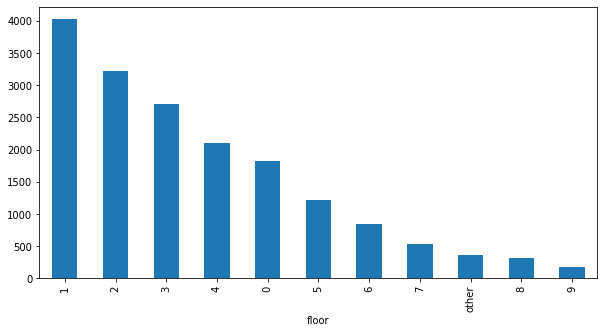

In [21]:
df.loc[(df['floor'] != "Bajo") & (df['is_floor_under']), 'floor'] = 'other'
df.loc[df['floor'] == "Bajo", 'floor'] = '0'

plt.rcParams['figure.figsize'] = [10, 5]
plt.xlabel('floor')
df['floor'].value_counts().plot(kind='bar')
plt.show()

We grouped the rarer `floor` categories together, and renamed the ground floor category.

### `energy_certificate` correlations

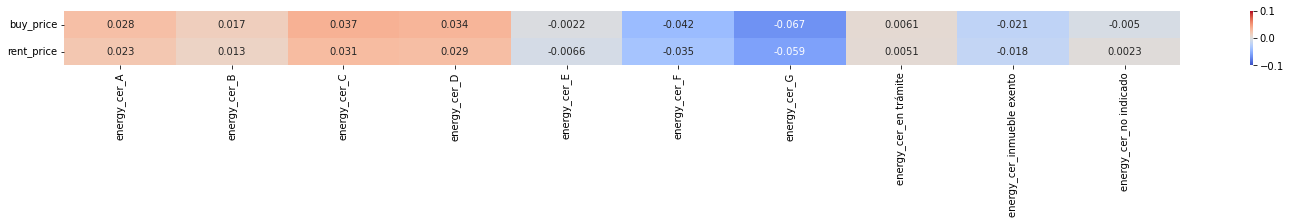

In [22]:
plt.rcParams['figure.figsize'] = [25, 1]
energy_df = pd.get_dummies(df['energy_certificate'], prefix='energy_cer')
energy_df[['buy_price', 'rent_price']] = df[['buy_price', 'rent_price']]

correlations = energy_df.corr().loc[['buy_price', 'rent_price'], :].drop(['buy_price', 'rent_price'], axis='columns')
sn.heatmap(correlations, annot=True, cmap="coolwarm", vmax=0.1, vmin=-0.1)
plt.show()

We see that `energy_certificate` don't have much impact in the price, but the model could benefit from its information. In order to simplify this, we will group the categories as `good`, `bad` and `unkown`.

In [23]:
display(df['energy_certificate'].unique())
df[['energy_certificate']] = df[['energy_certificate']].applymap(
    lambda x: 'good' if x in ['A', 'B', 'C', 'D'] else 'bad' if x in ['E', 'F', 'G'] else 'unknown')
display(df['energy_certificate'].unique())

array(['D', 'en trámite', 'no indicado', 'F', 'E', 'inmueble exento', 'B',
       'G', 'C', 'A'], dtype=object)

array(['good', 'unknown', 'bad'], dtype=object)

### `house_type_id` correlations

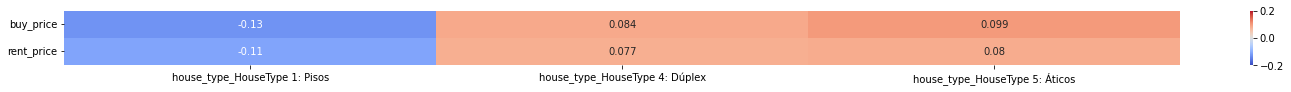

In [24]:
plt.rcParams['figure.figsize'] = [25, 1]
house_type_df = pd.get_dummies(df['house_type_id'], prefix='house_type')
house_type_df[['buy_price', 'rent_price']] = df[['buy_price', 'rent_price']]

correlations = house_type_df.corr().loc[['buy_price', 'rent_price'], :].drop(['buy_price', 'rent_price'], axis='columns')
sn.heatmap(correlations, annot=True, cmap="coolwarm", vmax=0.2, vmin=-0.2)
plt.show()

We will rename the `house_type_id` categories.

In [25]:
display(df['house_type_id'].unique())
df[['house_type']] = df[['house_type_id']].applymap(
    lambda x: 'flat' if x == "HouseType 1: Pisos" else 'duplex' if x == "HouseType 4: Dúplex" else 'attic')
df = df.drop(['house_type_id'], axis='columns')
display(df['house_type'].unique())

array(['HouseType 1: Pisos', 'HouseType 4: Dúplex', 'HouseType 5: Áticos'],
      dtype=object)

array(['flat', 'duplex', 'attic'], dtype=object)

### `neighborhood` correlations

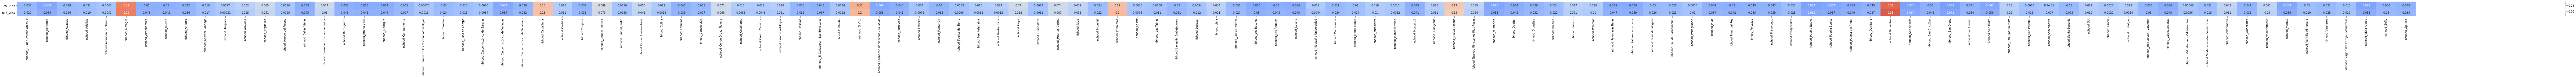

In [26]:
plt.rcParams['figure.figsize'] = [200, 1]
nbhood_df = pd.get_dummies(df['neighborhood'], prefix='nbhood')
nbhood_df[['buy_price', 'rent_price']] = df[['buy_price', 'rent_price']]

correlations = nbhood_df.corr().loc[['buy_price', 'rent_price'], :].drop(['buy_price', 'rent_price'], axis='columns')
sn.heatmap(correlations, annot=True, cmap="coolwarm", vmax=0.4, vmin=-0.2)
plt.show()

*PS: To visualize correctly the previous image, open it in another tab of your browser (drag and drop, or right click).*

### `district` correlations

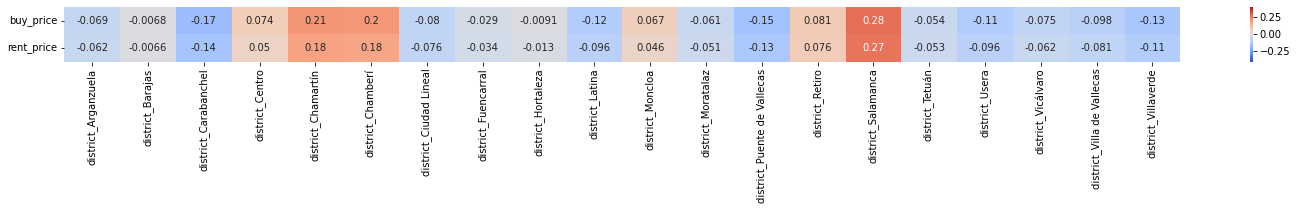

In [27]:
plt.rcParams['figure.figsize'] = [25, 1]
district_df = pd.get_dummies(df['district'], prefix='district')
district_df[['buy_price', 'rent_price']] = df[['buy_price', 'rent_price']]

correlations = district_df.corr().loc[['buy_price', 'rent_price'], :].drop(['buy_price', 'rent_price'], axis='columns')
sn.heatmap(correlations, annot=True, cmap="coolwarm", vmax=0.4, vmin=-0.4)
plt.show()

### Correlation exploration conclussions

- `is_floor_under` is dependent from `floor`.
- `district` and `neighborhood_price` are dependent from `neighborhood`.
- We can drop: `is_floor_under`, `district`, `neighborhood_price`.
- We will save district-neighborhood into a json file before dropping. We will need it later for the website.

In [28]:
import json
dist_neigh_df = df[['district', 'neighborhood']].set_index('district')
dist_neigh_dict = {idx: sorted(dist_neigh_df.loc[idx]['neighborhood'].unique().tolist()) for idx in dist_neigh_df.index.unique()}

with open('data/dist_neigh.json', 'w') as f:
    json.dump(dist_neigh_dict, f, ensure_ascii=False, sort_keys=True)

In [29]:
df = df.drop(labels=['is_floor_under', 'district', 'neighborhood_price'], axis='columns')

## Final curated dataset

#### Data columns:

- Numerical:
    - `sq_mt_built`
    - `n_rooms`
    - `n_bathrooms`
    
- Boolean:
    - `has_lift`
    - `has_parking`
    - `is_exterior`
    
- Categorical:
    - `floor`
    - `energy_certificate`
    - `neighborhood`
    - `house_type`
    
#### Targets:
- Numerical:
    - `buy_price`
    - `rent_price`

In [30]:
df = df.reindex(columns=['sq_mt_built', 'n_rooms', 'n_bathrooms', 'has_lift', 'has_parking', 'is_exterior',
                    'floor', 'energy_certificate', 'neighborhood', 'house_type', 'rent_price', 'buy_price'])

display(len(df))
display(df.dtypes.sort_values())
display(df.sample(10))

17326

has_lift                bool
has_parking             bool
is_exterior             bool
sq_mt_built            int64
n_rooms                int64
n_bathrooms            int64
rent_price             int64
buy_price              int64
floor                 object
energy_certificate    object
neighborhood          object
house_type            object
dtype: object

,sq_mt_built,n_rooms,n_bathrooms,has_lift,has_parking,is_exterior,floor,energy_certificate,neighborhood,house_type,rent_price,buy_price
7635,95,2,2,True,True,True,1,unknown,Argüelles,flat,1892,598000
6320,72,3,1,False,False,True,0,unknown,Lucero,flat,682,134000
20440,103,3,2,True,False,True,3,unknown,Palos de Moguer,flat,1474,415000
18785,200,5,3,True,False,True,5,bad,Sol,attic,2512,995000
18717,55,1,1,False,False,True,1,unknown,Malasaña-Universidad,flat,1323,350000
13153,210,4,3,True,True,True,1,unknown,Costillares,flat,2402,840000
13591,238,4,2,True,True,True,2,unknown,San Juan Bautista,flat,5742,1585000
21196,115,3,2,True,False,True,5,unknown,Acacias,flat,1802,559000
5980,110,4,2,True,True,True,9,unknown,Marroquina,flat,1508,430000
7044,142,3,2,True,True,True,7,unknown,Ciudad Universitaria,flat,2047,665000


In [31]:
df.to_csv("data/clean_madrid_houses.csv", index=False)